# Financial Time series Model

In [22]:
# By: Adam Gregg

import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [23]:
# Start date - July 31, 2012 - June 30, 2017
# Reading the data into a dataframe for the 4 stocks
fb_data = pd.read_csv('fb_data.csv', index_col = 'Date', date_parser = pd.core.tools.datetimes.to_datetime)
mmm_data = pd.read_csv('mmm_data.csv', index_col = 'Date', date_parser = pd.core.tools.datetimes.to_datetime)
ibm_data = pd.read_csv('ibm_data.csv', index_col = 'Date', date_parser = pd.core.tools.datetimes.to_datetime)
amzn_data = pd.read_csv('amzn_data.csv', index_col = 'Date', date_parser = pd.core.tools.datetimes.to_datetime)

fb_data.head()
mmm_data.head()
ibm_data.head()
amzn_data.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,151.90,151.92,150.0600,150.98,14540013.0,0.0,1.0,151.90,151.92,150.0600,150.98,14540013.0
2017-06-29,152.28,152.50,148.9175,151.04,23771610.0,0.0,1.0,152.28,152.50,148.9175,151.04,23771610.0
2017-06-28,150.92,153.47,149.8600,153.24,16621566.0,0.0,1.0,150.92,153.47,149.8600,153.24,16621566.0
2017-06-27,152.84,153.31,150.3900,150.58,19274022.0,0.0,1.0,152.84,153.31,150.3900,150.58,19274022.0
2017-06-26,156.25,156.50,153.1954,153.59,17934289.0,0.0,1.0,156.25,156.50,153.1954,153.59,17934289.0


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,209.91,209.910,207.85,208.19,1749132.0,0.0,1.0,208.700040,208.700040,206.651914,206.989955,1749132.0
2017-06-29,211.05,211.050,207.08,207.85,1792372.0,0.0,1.0,209.833469,209.833469,205.886353,206.651914,1792372.0
2017-06-28,210.78,211.175,210.09,210.62,1532866.0,0.0,1.0,209.565025,209.957749,208.879003,209.405948,1532866.0
2017-06-27,212.00,212.500,209.38,209.78,2226566.0,0.0,1.0,210.777993,211.275111,208.173095,208.570790,2226566.0
2017-06-26,212.79,213.470,212.31,212.61,1319058.0,0.0,1.0,211.563439,212.239520,211.086206,211.384477,1319058.0


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,154.28,154.50,153.14,153.83,3501395.0,0.0,1.0,151.159970,151.375521,150.043024,150.719070,3501395.0
2017-06-29,155.35,155.74,153.62,154.13,3245649.0,0.0,1.0,152.208331,152.590444,150.513317,151.013003,3245649.0
2017-06-28,155.15,155.55,154.78,155.32,2203062.0,0.0,1.0,152.012376,152.404286,151.649858,152.178938,2203062.0
2017-06-27,155.00,155.34,154.50,154.75,2385619.0,0.0,1.0,151.865409,152.198533,151.375521,151.620465,2385619.0
2017-06-26,154.71,155.75,154.63,155.23,2129945.0,0.0,1.0,151.581274,152.600242,151.502892,152.090758,2129945.0


,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-06-30,980.12,983.47,967.61,968.00,3309138.0,0.0,1.0,980.12,983.47,967.61,968.00,3309138.0
2017-06-29,979.00,987.56,965.25,975.93,4246765.0,0.0,1.0,979.00,987.56,965.25,975.93,4246765.0
2017-06-28,978.55,990.68,969.21,990.33,3708638.0,0.0,1.0,978.55,990.68,969.21,990.33,3708638.0
2017-06-27,990.69,998.80,976.00,976.78,3735360.0,0.0,1.0,990.69,998.80,976.00,976.78,3735360.0
2017-06-26,1008.50,1009.80,992.00,993.98,3347195.0,0.0,1.0,1008.50,1009.80,992.00,993.98,3347195.0


In [24]:
# Getting the adjusted close for the 4 stocks and resampling in order to select the last business day of the month
fb_adjclose = fb_data.AdjClose.resample('BM').last()
mmm_adjclose = mmm_data.AdjClose.resample('BM').last()
ibm_adjclose = ibm_data.AdjClose.resample('BM').last()
amzn_adjclose = amzn_data.AdjClose.resample('BM').last()

fb_adjclose.head()
mmm_adjclose.head()
ibm_adjclose.head()
amzn_adjclose.head()

Date
2012-07-31    21.710
2012-08-31    18.058
2012-09-28    21.660
2012-10-31    21.110
2012-11-30    28.000
Freq: BM, Name: AdjClose, dtype: float64

Date
2012-07-31    80.117221
2012-08-31    81.838026
2012-09-28    81.678945
2012-10-31    77.419126
2012-11-30    80.912524
Freq: BM, Name: AdjClose, dtype: float64

Date
2012-07-31    167.112403
2012-08-31    166.858424
2012-09-28    177.648345
2012-10-31    166.584394
2012-11-30    163.488846
Freq: BM, Name: AdjClose, dtype: float64

Date
2012-07-31    233.3000
2012-08-31    248.2700
2012-09-28    254.3200
2012-10-31    232.8931
2012-11-30    252.0500
Freq: BM, Name: AdjClose, dtype: float64

### Plotting Autocorrelations

Text(0.5,1,'Autocorrelations of the Adjusted Close for the 4 Stocks')

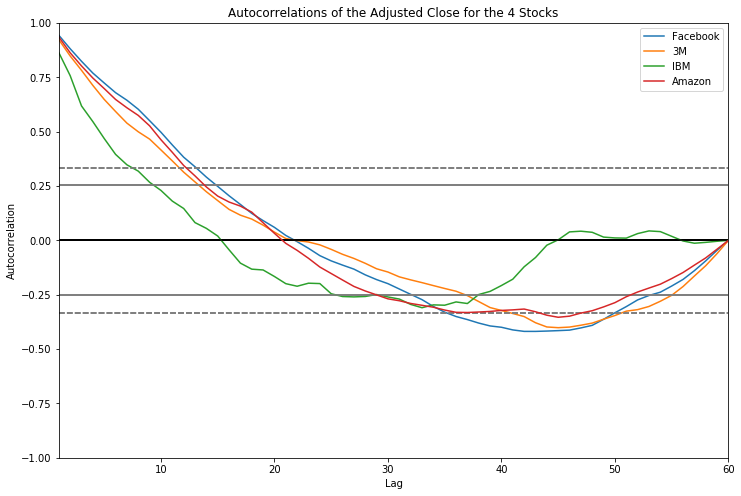

In [25]:
# Autocorrelation plots of the adjusted close for the 4 stocks 
plt.figure(figsize = (12,8))
plot1 = autocorrelation_plot(fb_adjclose, label = 'Facebook')
plot2 = autocorrelation_plot(mmm_adjclose, label = '3M')
plot3 = autocorrelation_plot(ibm_adjclose, label = 'IBM')
plot4 = autocorrelation_plot(amzn_adjclose, label = 'Amazon')
plt.legend(loc = 'best')
plt.title('Autocorrelations of the Adjusted Close for the 4 Stocks')
plt.show()
# All 4 curves below begin with a moderately high autocorrelation, occuring at Lag 1, that gradually decreases with a slight 
# increase towards the end. The majority of the data after approximately lag 12 for Facebook, 3M and Amazon and approximately 
# lag 7 for IBM fall within the dotted lines and therefore can be considered statistically insignificant. Overall, these curves 
# do not exhibit any sort of trend or seasonality and thus all 4 curves would be considered as weak autocorrelations.

### Monthly Returns

In [26]:
# Using the shift trick to calculate the monthly returns and resampling the data to the end of each month
mon_ret_fb = (fb_data.AdjClose.resample('M').last()/fb_data.AdjClose.resample('M').last().shift(1)) - 1
mon_ret_mmm = (mmm_data.AdjClose.resample('M').last()/mmm_data.AdjClose.resample('M').last().shift(1)) - 1
mon_ret_ibm = (ibm_data.AdjClose.resample('M').last()/ibm_data.AdjClose.resample('M').last().shift(1)) - 1
mon_ret_amzn = (amzn_data.AdjClose.resample('M').last()/amzn_data.AdjClose.resample('M').last().shift(1)) - 1

mon_ret_fb.head()
mon_ret_mmm.head()
mon_ret_ibm.head()
mon_ret_amzn.head()

Date
2012-07-31         NaN
2012-08-31   -0.168217
2012-09-30    0.199468
2012-10-31   -0.025392
2012-11-30    0.326386
Freq: M, Name: AdjClose, dtype: float64

Date
2012-07-31         NaN
2012-08-31    0.021479
2012-09-30   -0.001944
2012-10-31   -0.052153
2012-11-30    0.045123
Freq: M, Name: AdjClose, dtype: float64

Date
2012-07-31         NaN
2012-08-31   -0.001520
2012-09-30    0.064665
2012-10-31   -0.062280
2012-11-30   -0.018582
Freq: M, Name: AdjClose, dtype: float64

Date
2012-07-31         NaN
2012-08-31    0.064166
2012-09-30    0.024369
2012-10-31   -0.084252
2012-11-30    0.082256
Freq: M, Name: AdjClose, dtype: float64

### Plotting Return Correlations

Text(0.5,1,'Autocorrelations of the Monthly Returns for the 4 Stocks')

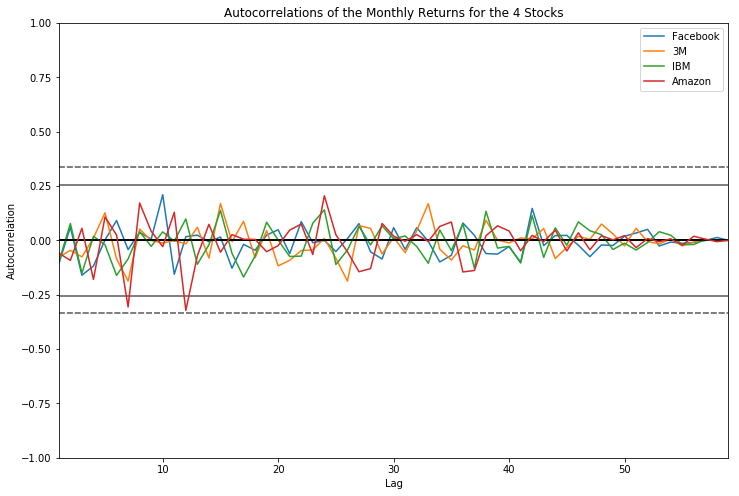

In [27]:
# Autocorrelation plots of the monthly returns for the 4 stocks
plt.figure(figsize = [12,8])
plot1 = autocorrelation_plot(mon_ret_fb[1:], label = 'Facebook')
plot2 = autocorrelation_plot(mon_ret_mmm[1:], label = '3M')
plot3 = autocorrelation_plot(mon_ret_ibm[1:], label = 'IBM')
plot4 = autocorrelation_plot(mon_ret_amzn[1:], label = 'Amazon')
plt.legend(loc = 'best')
plt.title('Autocorrelations of the Monthly Returns for the 4 Stocks')
plt.show()
# The graph below showing the autocorrelations of the monthly returns for the 4 stocks display randomness with no visible trend
# or seasonality. All the data points in the plots are between the two dotted lines meaning it is not statistically significant
# and thus there is no clear autocorrelation. 

,Facebook,3M,IBM,Amazon
Date,,,,
2012-08-31,-0.168217,0.021479,-0.001520,0.064166
2012-09-30,0.199468,-0.001944,0.064665,0.024369
2012-10-31,-0.025392,-0.052153,-0.062280,-0.084252
2012-11-30,0.326386,0.045123,-0.018582,0.082256
2012-12-31,-0.049296,0.020891,0.007787,-0.004682


,Facebook,3M,IBM,Amazon
Facebook,1.000000,0.096255,0.041273,0.212371
3M,0.096255,1.000000,0.260762,0.308424
IBM,0.041273,0.260762,1.000000,0.199674
Amazon,0.212371,0.308424,0.199674,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000224624823C8>,
      dtype=object)

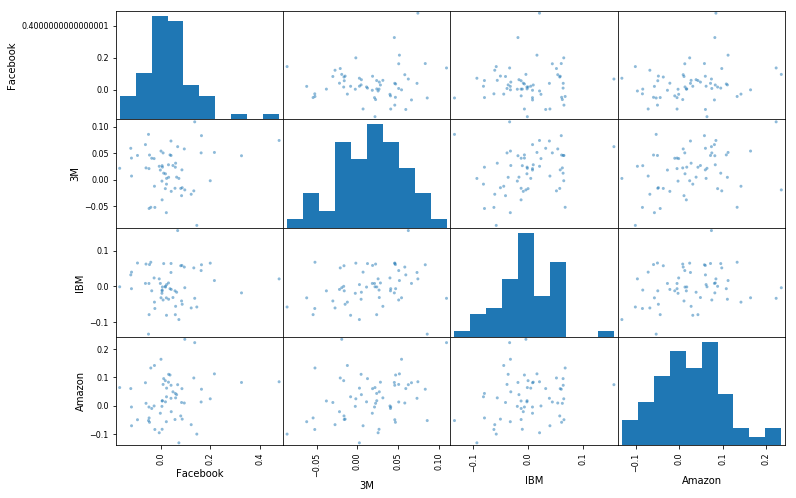

In [28]:
# Creating dataframes for the monthly returns 
mon_ret1 = pd.DataFrame(mon_ret_fb)
mon_ret2 = pd.DataFrame(mon_ret_mmm)
mon_ret3 = pd.DataFrame(mon_ret_ibm)
mon_ret4 = pd.DataFrame(mon_ret_amzn)

# Combining the monthly returns of the 4 stocks into one larger dataframe
monthly_returns = pd.merge(pd.merge(mon_ret1, mon_ret2, left_index=True, right_index=True), 
                           pd.merge(mon_ret3, mon_ret4, left_index=True, right_index=True),
                           left_index=True, right_index=True)

# Renaming the columns of the dataframe
monthly_returns.rename({'AdjClose_x_x': 'Facebook', 'AdjClose_y_x': '3M', 'AdjClose_x_y': 'IBM', 'AdjClose_y_y': 'Amazon'}, 
                       axis = 'columns', inplace = True)

# Dropping the NaN values in the dataframe
monthly_returns.dropna(inplace = True)
monthly_returns.head()

# Determining the correlation coefficients of the monthly returns between the 4 stocks 
Corr = monthly_returns.corr()
Corr

# Plotting the scatter matrix in order to visualize the correlations among the 4 companies in terms of their monthly returns
scatter_matrix(monthly_returns, figsize = (12,8), alpha = 0.5)

The scatter matrix above shows that the monthly returns among the companies are correlated however it is fairly weak overall. 3M and Amazon are the most correlated in terms of their monthly returns with a correlation coefficient of 0.308. However, Facebook and IBM are the least correlated in terms of their monthly returns with a correlation coefficient of 0.041.

([<matplotlib.axis.YTick at 0x22466bc88d0>,
 <a list of 4 Text yticklabel objects>)

([<matplotlib.axis.XTick at 0x22466bb0668>,
 <a list of 4 Text xticklabel objects>)

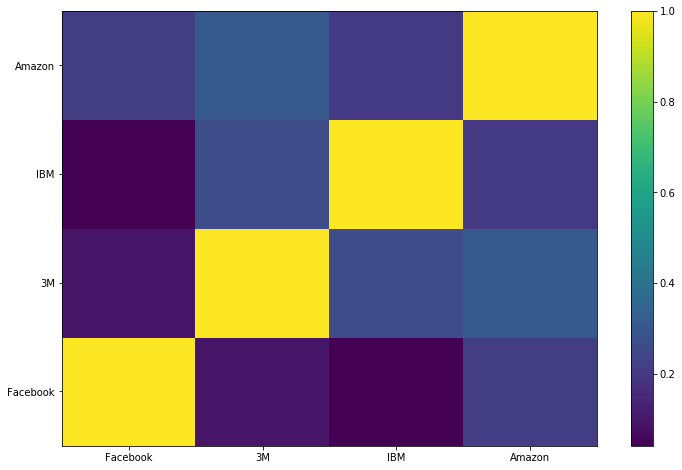

In [52]:
# Transpose the dataframe in preparation for plotting
MRT = monthly_returns.T.values

# Plotting a heat map for better visualization of the correlation coefficients
plt.figure(figsize = (12,8))
ax = corrcoef(MRT)
pcolor(ax)
colorbar()
yticks(arange(0.5,4),['Facebook', '3M', 'IBM', 'Amazon'])
xticks(arange(0.5,4),['Facebook', '3M', 'IBM', 'Amazon'])